## CSE 7393 Machine Learning in Python - Class Project (Dr. Eric Larson) : Deep Neural Networks on NYPD's  Stop-and-Frisk 



**Team members**:
  * Name 1: Mahmoud Badi 
  * Name 2: Rahul Khandalkar
  * Name 3: Aman Singh 
  
**Goal and Business/Use Case**:  
We have utilized NYPDs Stop and Frisk dataset for our Lab 2.
In our dataset (2012), New Yorkers were stopped by the police 532,911 times:
- 473,644 were totally innocent (89 percent).
- 284,229 were black (55 percent).
- 165,140 were Latino (32 percent).
- 50,366 were white (10 percent).

In order to understand the information captured in the csv file, we took a look at the specs document that helps us identify the various features recorded in our dataset.
Our goal is to build a classification algorithm that can predict arrests efficiently so that they can be implemented on other states or other country's law enforcement databases. This will not only help reduce the number of inmates in prisons and save tax payer's money but also decrease the public frustration rate/anger and improve's the law enforcement's credibility.
We found that people of African or Hispanic descent were stopped more frequently than whites. This is due to the fact that humans make decisions based on their own experiences with people from different races, ages, shapes, and other characterisitics. We've also tried to find a correlation between the arrests made, age, and race.
Using a strong classification algorithm will allow a law enforcement agency to negate the possibility of making mistakes, give them a second non-judgemental point of view, and reduce the unprofessionalism of police by a high extent.

### Defining and Preparing Our Variables 

Our Dataset came with 112 features. Due to the massive size of this datasete  and the computational needs to accomodate such big dataset, we performed this lab only on a fraction of these  features which we believe are important and came up with results that backup the claims of the police being unprofessional and biased in their judgments and arrests. 
The part where we do visualization is not included here, since it will be a replica of what we did in lab2. If the reader is interested in seeing if actually the police of NYC were biased and unprofessional, this is proved in our visualization part 
in lab2. 

We shortlisted and included the following features in this Deep Neural Network project:

* **perobs**: Period of Observation
* **rf_attir**: reason for frisk: inappropirate attire for season 
* **offunif**: Was officer in uniform? 
* **inout**: WAS STOP INSIDE OR OUTSIDE ?
* **perstop**: PERIOD OF STOP (MMM)
* **arstmade**: WAS AN ARREST MADE ?
* **frisked**: WAS SUSPECT FRISKED ?
* **searched**: WAS SUSPECT SEARCHED ?
* **contrabin**: WAS CONTRABAND FOUND ON SUSPECT ?
* **pistol**: WAS A PISTOL FOUND ON SUSPECT ?
* **race**: SUSPECT'S RACE
* **sex**: SUSPECT'S SEX
* **age**: SUSPECT'S AGE 


**Some Preprocessing Operations**:

* We've converted all Yes and No values to 1s and 0s.
* We also performed one-hot encoding on *sex* and *race* and had all of these one-hot-encoded values saved into columns (Improvement on lab2 : we lost points because we didn't do this in lab2).
* Removed all of the NaNs.
* Concatenated all of the feature columns into one X_all variable that has all of our features.
* We didn't implement PCA here, because when we tried implementing it on these features in lab2, it wasn't able to seperate.

**The final dataset will be in X_all where all of the engineered features will be stored** 

**We will comment on each pre-processing step just to make it clear**

In [5]:
import sys
import pandas as pd        #importing pandas to read the file
import numpy as np         #importing numpy as we will need it later 

In [8]:
%%time
df=pd.read_csv('2012.csv') #reading the CSV file of 2012 dataset for Stop and Frisk 

<string>:2: DtypeWarning: Columns (73,103) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 6.1 s


In [4]:
X=pd.DataFrame()               #creating the X variable to put the features in. 
X['age']=df['age']
X['sex']=df['sex']
X['race']=df['race']
X['perobs']=df['perobs']
X['inout']=df['inout']
X['rf_attir']=df['rf_attir']
X['searched']=df['searched']
X['frisked']=df['frisked']
X['offunif']=df['offunif']
X['pistol']=df['pistol']
X['contrabn']=df['contrabn']
X['arstmade']=df['arstmade']
X['pct']=df['pct']
X=X.replace(['Y', 'N'], [1, 0]) #changing all of Yes and NOs to 1s and 0s
X=X.replace(['I', 'O'], [1, 0]) #changing the "In" and "Out" to 1 and 0 too 
y=X['arstmade']                 #creating our target class variable which is the arrest 
X = X.dropna()                  #dropping any NaNs

In [5]:
#This is one of the improvements that we applied on lab2 
#Here, we're using *get_dummies* the correct way and after using get_dummies we save it in a column ! 
X_sex=pd.get_dummies(X.sex)
X_sex=X_sex.astype(int)

In [6]:
#For the one-hot-encoding we implements the race feature 
X_race=pd.get_dummies(X.race)
X_race=X_race.astype(int)
#We're trying to be consistent with the datatype selection since we had some issues with different data types when we were trying to perform the prediction,
#int64 and int32 were both present but incompatible, therefore we are implementing the int datatype on all the integer variables.

In [7]:
X_race.info() 
#Note that the race value of "1" is actually the race "I" in the specifications file, which is American Indian/Alaskan Native 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529477 entries, 0 to 529476
Data columns (total 8 columns):
1    529477 non-null int32
A    529477 non-null int32
B    529477 non-null int32
P    529477 non-null int32
Q    529477 non-null int32
U    529477 non-null int32
W    529477 non-null int32
Z    529477 non-null int32
dtypes: int32(8)
memory usage: 20.2 MB


In [8]:
#For the precinct under which the frisk/search was conducted

X_pct=pd.get_dummies(X.pct)
X_pct=X.pct

#Note: When we used this in our dataset the Deep Neural Network couldn't come up with the prediction in hours and our 
#Jupyter Notebooks and Python crashed. I think that the problem is that it is a huge feature (123 columns)
#Even after using one-hot-encoding or hashing it, it still is too big for our limited resoruces. 
#We will not touch it until we perform all of the required tasks, and afterwards if we have time, we can stick it back 
#in and run the proposed architectures. 
#We will check if they converge and come up with more solutions, optimum weights, and eventually a prediction.

In [9]:
X_age=X.age
X_perobs=X.perobs
X_rfattir=X.rf_attir
X_searched=X.searched
X_frisked=X.frisked
X_offunif=X.offunif
X_pistol=X.pistol
X_contrabn=X.contrabn
X_arstmade=X.arstmade

In [10]:
#Concatinating all feature columns together 
#Note that from an architecture point of view, we wanted our feature inputs to be in one concatenated variable which will then be fed to our network 
X_all = pd.concat((X_race,X_sex,X_age,X_perobs,X_rfattir,X_searched,X_frisked,X_offunif,X_pistol,X_contrabn,X_arstmade)
                  ,axis=1)
X_all.head()
#Now, all our features have been concatenated in one big X_all 

1  A  B  P  Q  U  W  Z  F  M  Z  age  perobs  rf_attir  searched  frisked  \
0  0  0  1  0  0  0  0  0  0  1  0   32       1         0         0        0   
1  0  0  0  0  1  0  0  0  1  0  0   31       1         0         0        1   
2  0  0  1  0  0  0  0  0  1  0  0   31       3         0         0        0   
3  0  0  1  0  0  0  0  0  0  1  0   29       2         0         0        0   
4  0  0  1  0  0  0  0  0  0  1  0   26       1         0         0        0   

   offunif  pistol  contrabn  arstmade  
0        0       0         0         0  
1        1       0         0         1  
2        1       0         0         0  
3        1       0         0         0  
4        0       0         0         0

In [11]:
X_all=X_all.astype(int)
X_all.info() #Verifying the data types of our X_all variable.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529477 entries, 0 to 529476
Data columns (total 20 columns):
1           529477 non-null int32
A           529477 non-null int32
B           529477 non-null int32
P           529477 non-null int32
Q           529477 non-null int32
U           529477 non-null int32
W           529477 non-null int32
Z           529477 non-null int32
F           529477 non-null int32
M           529477 non-null int32
Z           529477 non-null int32
age         529477 non-null int32
perobs      529477 non-null int32
rf_attir    529477 non-null int32
searched    529477 non-null int32
frisked     529477 non-null int32
offunif     529477 non-null int32
pistol      529477 non-null int32
contrabn    529477 non-null int32
arstmade    529477 non-null int32
dtypes: int32(20)
memory usage: 44.4 MB


In [12]:
print(X_all.shape) #We have 529477 rows and 20 coloumns now. X_all is our dataset as we had indicated above.  
X_all.info()

(529477, 20)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 529477 entries, 0 to 529476
Data columns (total 20 columns):
1           529477 non-null int32
A           529477 non-null int32
B           529477 non-null int32
P           529477 non-null int32
Q           529477 non-null int32
U           529477 non-null int32
W           529477 non-null int32
Z           529477 non-null int32
F           529477 non-null int32
M           529477 non-null int32
Z           529477 non-null int32
age         529477 non-null int32
perobs      529477 non-null int32
rf_attir    529477 non-null int32
searched    529477 non-null int32
frisked     529477 non-null int32
offunif     529477 non-null int32
pistol      529477 non-null int32
contrabn    529477 non-null int32
arstmade    529477 non-null int32
dtypes: int32(20)
memory usage: 44.4 MB


In [62]:
#To create our model and start working with our proposed Deep Neural Networks,
# we will import tensorflow as tf and also import the layers and learn which we will use for our architectures 
%time a = "Time taken for this cell"
import tensorflow as tf
import numpy as np
from tensorflow.contrib import layers
from tensorflow.contrib import learn
print(a)

Wall time: 0 ns
Time taken for this cell


In [14]:
#Now, we will split our dataset into training and testing, 80% will be used for testing and 20% for training. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all.values, y.values, test_size=0.8, random_state=42)

### * *Dividing the data (as in Lab2)
We choose the hold-out method because our dataset is large enough making the 30%-70% test split more suited to the hold-out method. K-fold is computationally expensive for a dataset of our size compared to hold-out method. 

### Performance Evaluation Metrics:

Accuracy is very deceiving when it comes to evaluating models, especially when you have a class imbalance problem. 
Therefore, we chose the following performance evaluation metrics:

1. **Confusion Matrix**: We used the confusion matrix to see the number of true positives and false positives as well as 
the false positives and false negatives in our classifiers.
2. **Area Under the Curve**: We used the value of the area under the ROC (Receiver Operating Characteristics) curve as an indication of how good our model is. This is a good way of evaluating the classifier since we  mostly care about the
true positives and false positives in our project. 
    * **True Positive (TP)** means that a person who is arrested we predicted that they should be arrested, this is good because it reduces the possibility of racial bias by the police and ensures that bad people are in jail.
    * Also, **False Positives (FP)** are very important since we care about not arresting people who don't deserve to be arrested! 
    * True Positive and False Positive rates are used and the calculated area under the curve is one of our main metrics. The higher the area under the curve the better. The closer to 1 (ideal ROC) is the better.
3. **Cost Sensitive Measures**: We also used Precision, Recall, F-1, and Support measures to evaluate our classifier models. 
    * Higher precision at the specific class means lower false positives which as we explained, is a very important indicator. 
    * Also, Recall is used to indicate how are our false negative predictions, where a higher recall means a lower false negative, which is good for our case. 
    * F1 is an indication of both, this means that a higher F1 means lower FP and FN which we care about in our classifiers. 
    As mentioned by Dr. Eric in Lab2's comment, F1 is probably the best candidate for how well our model is performing
    * Support is the number of occurrences of each class in the actual data and we can use it to indicate how many times we predicted right.
4. **Accuracy** is not used as an actual performance evaluation metric. In Lab2, We just used it as an initial evaluation metric and compared it to the accuracy of our 'Base Rate Model' that predicted zero arrests were made on all people and we showed that
for a class imbalanced problem, accuracy is definitely not a performance metric. 

###  Test Architecture:
In Lab2, we created a base model that made a prediction that all people were not arrested and it was 94% accurate, which made it clear that accuracy is not our performance evaluation metric of course. We used this model as a baseline to compare it with the other models we had created. We will do the same thing here; we will create a test architecture that was arbitrarly chosen and see its prediction performance on our dataset. Later, when we look at our proposed Deep Neural Network Architectures, we will compare it with this base model.

In [15]:
import tensorflow.contrib.learn as skflow

In [75]:
#Test Architecture/Dump Architecture
#arbitrary number of layers and hidden neurons, also, we chose only one ReLU activation function and one logistic regression 

import tensorflow as tf
import numpy as np
from tensorflow.contrib import layers
from tensorflow.contrib import learn
def my_model(features, target):
    print(features)
    target = tf.one_hot(target,2,1,0) 
    #One hot encoding the output as it is a binary output, a 1 or 0 
    features = layers.stack(features, layers.fully_connected, [10, 20, 10]) 
    #Sticking the input to 3 hidden layers with 10, 20, and 10 neurons
    features = tf.nn.relu(features) 
    #Then passing it through a ReLU function 
    prediction, loss = (
        tf.contrib.learn.models.logistic_regression_zero_init(features, target) 
        #and then throught a Logistic Regression function
    )
    train_op = tf.contrib.layers.optimize_loss(
        loss, tf.contrib.framework.get_global_step(), optimizer='Adagrad',
        learning_rate=0.1)
    return {'class': tf.argmax(prediction, 1), 'prob': prediction}, loss, train_op
classifier = learn.Estimator(model_fn=my_model)

classifier.fit(X_train.astype(np.float32), y_train.astype(np.int64), steps=10)
#Increased numb of steps this helped to reduce the final loss (important observation)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_evaluation_master': '', 'save_summary_steps': 100, 'tf_random_seed': None, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'save_checkpoints_steps': None, '_environment': 'local', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000037A94320>, 'keep_checkpoint_every_n_hours': 10000, '_task_id': 0, 'save_checkpoints_secs': 600, '_task_type': None, '_num_ps_replicas': 0, '_is_chief': True, '_master': '', 'keep_checkpoint_max': 5}


INFO:tensorflow:Using config: {'_evaluation_master': '', 'save_summary_steps': 100, 'tf_random_seed': None, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'save_checkpoints_steps': None, '_environment': 'local', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000037A94320>, 'keep_checkpoint_every_n_hours': 10000, '_task_id': 0, 'save_checkpoints_secs': 600, '_task_type': None, '_num_ps_replicas': 0, '_is_chief': True, '_master': '', 'keep_checkpoint_max': 5}


Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


Tensor("input:0", shape=(?, 20), dtype=float32)
Instructions for updating:
Use `tf.contrib.losses.softmax_cross_entropy` and explicit logits computation.


Instructions for updating:
Use `tf.contrib.losses.softmax_cross_entropy` and explicit logits computation.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:step = 1, loss = 0.693204


INFO:tensorflow:step = 1, loss = 0.693204


INFO:tensorflow:Saving checkpoints for 1 into C:\Users\INSTAL~1.15-\AppData\Local\Temp\tmppvefcuq5\model.ckpt.


INFO:tensorflow:Saving checkpoints for 1 into C:\Users\INSTAL~1.15-\AppData\Local\Temp\tmppvefcuq5\model.ckpt.


INFO:tensorflow:Saving checkpoints for 10 into C:\Users\INSTAL~1.15-\AppData\Local\Temp\tmppvefcuq5\model.ckpt.


INFO:tensorflow:Saving checkpoints for 10 into C:\Users\INSTAL~1.15-\AppData\Local\Temp\tmppvefcuq5\model.ckpt.


INFO:tensorflow:Loss for final step: 0.258725.


INFO:tensorflow:Loss for final step: 0.258725.


Estimator(params=None)

In [18]:
#Looking at the test architecture's accuracy score since we're being curious

from sklearn import metrics
yhat_dict =  list(classifier.predict(X_test.astype(np.float32),as_iterable=True))
yhat = np.array([x['class'] for x in yhat_dict])

score = metrics.accuracy_score(y_test.astype(np.int64),yhat)
print(score)

#The test architecture gave us a score of 93.9%, which is not significantn but remember and 
# this is not our performance evaluation metric! 

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Tensor("input:0", shape=(?, 20), dtype=float32)
Instructions for updating:
Use `tf.contrib.losses.softmax_cross_entropy` and explicit logits computation.
INFO:tensorflow:Loading model from checkpoint: C:\Users\INSTAL~1.15-\AppData\Local\Temp\tmpnbz_aa95\model.ckpt-10-?????-of-00001.
0.939487513634


#### Performance of this Test DNN architecture: 

We will evaluate it based on exactly the same performance metrics as in Lab2 which have been mentioned anabove:

* Confusion Matrix 
* F1 
* Precision 
* Recall 
* Area Under the Curve (AUC)

In [19]:
from sklearn.metrics import confusion_matrix
print(" -- Confusion Matrix for the test DNN architecture -- \n ", confusion_matrix(y_test, yhat))
#As we can see, based on the output of this Confusion Matrix, we can see that this DNN architecture didn't learn and 
#couldn't optimize the weights
#this is clear in the FP and TP since they are zero. It tells us that it couldn't figure out the arrests at all. 
#Of course this is expected! The number of hidden neurons is very small, also, the steps are only 10 which is not enough at all

 -- Confusion Matrix for the test DNN architecture -- 
  [[397950      0]
 [ 25632      0]]


In [20]:
# Using the Area Under the Curve AUC metric 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import classification_report
testDNN_roc_auc=roc_auc_score(y_test, yhat)
print("FirstDNN  AUC =%2.2f"%testDNN_roc_auc)
print(classification_report(y_test, yhat) )

FirstDNN  AUC =0.50
             precision    recall  f1-score   support

          0       0.94      1.00      0.97    397950
          1       0.00      0.00      0.00     25632

avg / total       0.88      0.94      0.91    423582



C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#####  Comment 
As we can see from our TEST DNN Architecture, it didn't learn and thus gave very poor performance.

We can see that our Area Under the Curve (AUC = 0.5) looks similar to a random model, and has 0 recall, precision, and F1 scores that could judge when arrests are made.

In [21]:
#The ROC curve of this Test DNN Architecture 
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds=roc_curve(y_test, yhat)
#implementing the ROC curve 

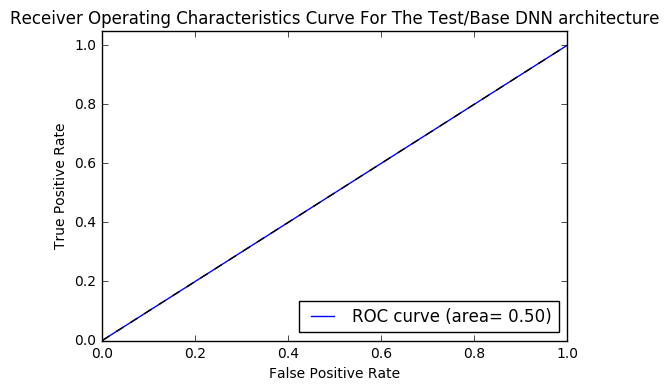

In [22]:
#Here we're plotting the ROC curve for the arrest class
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %2.2f)' % testDNN_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve For The Test/Base DNN architecture")
plt.legend(loc="lower right")
plt.show()

### Comments:
As we can see here, our test/base neural network didn't learn as it is of very few hidden neurons and we only included 10 optimization steps which is certainly one of the main limitations and is not enough for the optimization process.  
We believe that we can do much better if we implemented a deeper network with tuned hyper-parametes! 

### First Architecture

Comments on Number of Steps and its effect on loss

In the test Deep NN Architecture and with only 10 steps, we had a loss of 0.259416

In this Deep NN architecture and with 10 steps but deeper network we got a loss of 0.255247

With this Deep NN architecture but with 50 steps, as you can see, we have a loss of 0.246822

Let's see its accuracy just out of curiousity

### First Deep Neural Network Architecture 

###  * Architecture Source *

**The following network architecture was created as a result of the following**:
    
1. **Meeting with Dr. Eric**: Mahmoud was recommended by Dr. Eric to use a fully connected layer right after the input layer and then right before the output to use a logistic regression, and some layers in between.
2. **Google**: We looked at some of Google's papers in Deep Learning and we saw that they used 3 ReLUs in connected to each other in their youtube recommendation paper (given below) and we saw how they dramatically decreased the loss by more than 5% and how they wrote about how adding depth significantly improves precision on hold out data. 


In [23]:
def my_model(features, target):
    print(features)
    target = tf.one_hot(target,2,1,0) #one hot encoding the output as it is a binary output, a 1 or 0 
    features = layers.stack(features, layers.fully_connected, [300]) #we increased the number of neurons here
    features = tf.nn.relu(features)#then passing it through a ReLU function 
    features = tf.nn.relu(features)#passing it through another ReLU
    features = tf.nn.relu(features)#and a third ReLU
    prediction, loss = (
      tf.contrib.learn.models.logistic_regression_zero_init(features, target) #and then throught a Logistic Regression function
    )
    train_op = tf.contrib.layers.optimize_loss(
      loss, tf.contrib.framework.get_global_step(), optimizer='Adagrad',
      learning_rate=0.1)
    return {'class': tf.argmax(prediction, 1), 'prob': prediction}, loss, train_op
classifier = learn.Estimator(model_fn=my_model)

classifier.fit(X_train.astype(np.float32), y_train.astype(np.int64), steps=200)#increased numb of steps, final loss decreased


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', 'save_summary_steps': 100, 'tf_random_seed': None, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'save_checkpoints_steps': None, '_environment': 'local', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000000364FEA90>, 'keep_checkpoint_every_n_hours': 10000, '_task_id': 0, 'save_checkpoints_secs': 600, '_task_type': None, '_num_ps_replicas': 0, '_is_chief': True, '_master': '', 'keep_checkpoint_max': 5}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and b

Estimator(params=None)

In [24]:
yhat_dict =  list(classifier.predict(X_test.astype(np.float32),as_iterable=True))
yhat = np.array([x['class'] for x in yhat_dict])

score = metrics.accuracy_score(y_test.astype(np.int64),yhat)
print(score)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Tensor("input:0", shape=(?, 20), dtype=float32)
Instructions for updating:
Use `tf.contrib.losses.softmax_cross_entropy` and explicit logits computation.
INFO:tensorflow:Loading model from checkpoint: C:\Users\INSTAL~1.15-\AppData\Local\Temp\tmp5clfb0j5\model.ckpt-200-?????-of-00001.
0.980136077548


In [25]:
#look at accuracy
from sklearn.metrics import confusion_matrix
print(" -- Confusion Matrix for the first DNN architecture -- \n ", confusion_matrix(y_test, yhat))

 -- Confusion Matrix for the first DNN architecture -- 
  [[397949      1]
 [  8413  17219]]


In [26]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([397950,  25632], dtype=int64))

In [27]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import classification_report
deep1_roc_auc=roc_auc_score(y_test, yhat)
print("First Deep NN AUC =%2.2f"%deep1_roc_auc)
print(classification_report(y_test, yhat) )

First Deep NN AUC =0.84
             precision    recall  f1-score   support

          0       0.98      1.00      0.99    397950
          1       1.00      0.67      0.80     25632

avg / total       0.98      0.98      0.98    423582



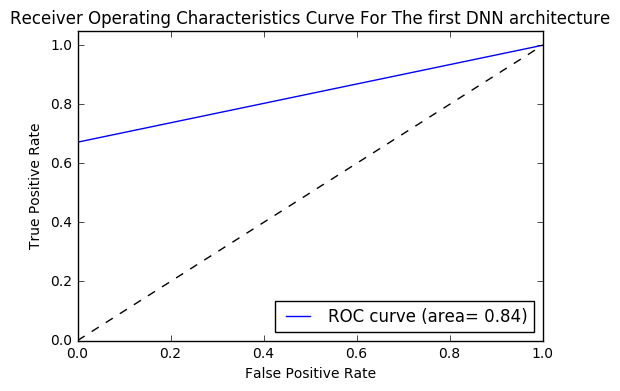

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds=roc_curve(y_test, yhat)
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %2.2f)' % deep1_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve For The first DNN architecture")
plt.legend(loc="lower right")
plt.show()

### Comments:
This result was achieved after **tuning**  the following:

    . The number of hidden neurons in the fully connected layer. We used on fully connected layer that is then fed to 3 layers 
     of ReLU functions and then to a logistic regression. As mentioned before, we used this architecture because we saw one paper from Google's research team where they used 3 ReLUs. Since we couldn't find blogs nor papers that deal with a similar dataset like ours, we chose this part of the architecture from them. And we came up with the idea of starting with a Fully Connected layer  and ending with a logistic regression before the output from a meeting with Dr. Eric and our understanding to our lectures.
    
    . The steps: we started with only 10 steps, which gave a very bad performance (almost a random 0.5 AUC model) then
    we increased the number of steps until we reached 200 steps and it gave what we  consider good performance based on what
    we use as performance metrics. 
So, basically we kept on changing these two parameters until we got this result that we felt comfortable with.
This was done manually because we couldn't get GridSearch to work in our estmitaor. It kept on giving errors every time with 
whatever change we made for the parameters of the grid. 

We can notice the following from this Deep Neural Network Architecture:
    1. Performance:
    Overall, this architecture gave a good performance based on our performance evaluation metrics.
    These performance metrics are:
        - The highest Area Under the Curve we obtained was 0.86 which is better than what we got with logistic regression
        in lab2 (we got 0.82 AUC in lab2 with logistic regression which was the highest performer). However, it is worth mentioning that everytime we run the code we slightly different result. Now as you can see we have an AUC of 0.83 
        where before, we had AUC = 0.86 . 
        - Cost Sensitive Measures: We have high recall and high precision which indicates low false negatives and low false
            positives respectively. These two metrics matter the most since we don't want to predict that someone should be 
            arrested when they are not supposed to be arrested, and, at the same time, we don't want to leave a person
            free when they are supposed to be arrested. So, Recall and Precision are of very significant importance in our 
            evaluation, as well as F1 of course since it combines both, higher F1 means lower FN and FP.
        - When we executed the code again, we had an AUC of 1 which indicates perfect performance and Recall, Precision =1
          This is something that we need to investigate more to understand the reason behind it. 
     
     2.Architecture and Computational Complexity:
     As this network architecture is considered not very complex, it took quite a while to run and optimize the weights and 
     come up with the output layer. In the next architecture, we will go deeper, as we will add more layers and give the 
     optimizer more steps to try and come up with more accurate weights/results. 


###  **GridSearch and Tuning The Hyper-Parameters**: 

As we mentioned above, we were not able to apply GridSearch for tuning the hyper-parameters, so, we had to do it manualy.
    
Let's do more tuning  and change the **number of hidden neurons** even more and this time we will change also the **learning
rate** and the number of **steps**. We will choose a smaller value for the learning rate and a larger number of steps.
Let's see and visualize the performance on the ROC curve and evaluate the performance:

In [49]:
#Let's choose the number of hidden neurons to be = 400 
# learning rate = 0.05
# number of steps = 300 


#Remember we are still working on the first architecture. We are just tuning the hyper-parameters to see if we can 
#get better performance 

In [29]:
def my_model(features, target):
    print(features)
    target = tf.one_hot(target,2,1,0) #one hot encoding the output as it is a binary output, a 1 or 0 
    features = layers.stack(features, layers.fully_connected, [400]) #we increased the number of neurons here
    features = tf.nn.relu(features)#then passing it through a ReLU function 
    features = tf.nn.relu(features)#passing it through another ReLU
    features = tf.nn.relu(features)#and a third ReLU
    prediction, loss = (
      tf.contrib.learn.models.logistic_regression_zero_init(features, target) #and then throught a Logistic Regression function
    )
    train_op = tf.contrib.layers.optimize_loss(
      loss, tf.contrib.framework.get_global_step(), optimizer='Adagrad',
      learning_rate=0.05)
    return {'class': tf.argmax(prediction, 1), 'prob': prediction}, loss, train_op
classifier = learn.Estimator(model_fn=my_model)

classifier.fit(X_train.astype(np.float32), y_train.astype(np.int64), steps=300)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', 'save_summary_steps': 100, 'tf_random_seed': None, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'save_checkpoints_steps': None, '_environment': 'local', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000006782D080>, 'keep_checkpoint_every_n_hours': 10000, '_task_id': 0, 'save_checkpoints_secs': 600, '_task_type': None, '_num_ps_replicas': 0, '_is_chief': True, '_master': '', 'keep_checkpoint_max': 5}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and b

Estimator(params=None)

In [30]:
#just looking at accuracy out of curousity 
score = metrics.accuracy_score(y_test.astype(np.int64),yhat)
print(score)

0.980136077548


In [31]:
#The confusion matrix here is a good indicator for our False Positives, False Negatives, and True Positives. 
print(" -- Confusion Matrix for the first DNN architecture -- \n ", confusion_matrix(y_test, yhat))

 -- Confusion Matrix for the first DNN architecture -- 
  [[397949      1]
 [  8413  17219]]


In [32]:
#we still have high Recall, Precision, and most importantly F1 
#In fact, we have exactly the same AUC as we had before this additional tuning
#one thing that is maybe worth mentioning is that we decreased the final loss value 
deep1ht_roc_auc=roc_auc_score(y_test, yhat)
print("First Deep NN after tuning AUC =%2.2f"%deep1ht_roc_auc)
print(classification_report(y_test, yhat) )

First Deep NN after tuning AUC =0.84
             precision    recall  f1-score   support

          0       0.98      1.00      0.99    397950
          1       1.00      0.67      0.80     25632

avg / total       0.98      0.98      0.98    423582



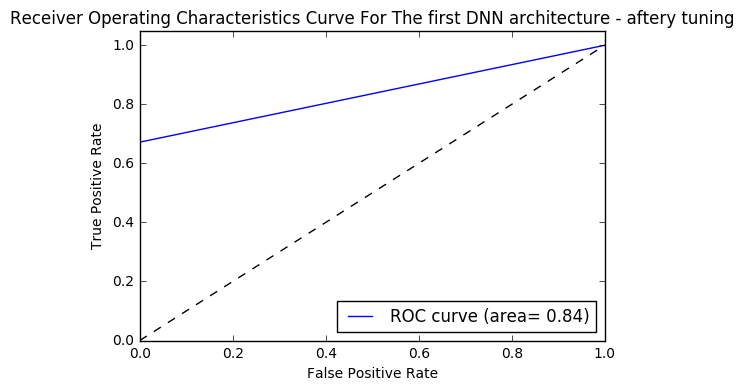

In [33]:
fpr, tpr, thresholds=roc_curve(y_test, yhat)
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %2.2f)' % deep1ht_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve For The first DNN architecture - aftery tuning")
plt.legend(loc="lower right")
plt.show()

####  **Comment**:
As we can see, after "some" tuning of the hyper-parameters, we impacted only the final step loss which was reduced from
0.038377 to 0.0306 (first run) and from 0.0414 to 0.025, in the second run. Maybe this is the best that this architecture 
can do. Even though, we mentioned that we once received AUC = 0.86. 

**Analyzing Results of the First Architecture**: 

We tried doing more tuning as we focused on increasing the number of hidden neurons and the number of steps as well
but we didn't obtain performance that is better than 0.86 
**To sum up** : 
For the first Deep Neural Network Architecure, we obtained the following:
    - Highest Area Under the Curve (AUC)  was 0.86 
    - Performance was oscillating between 0.82 ~ 0.86 while tuning the hyper-parameters
    - With tuning the hyper-parameters as we saw above we obtained a value of AUC of 0.83 which was the most consistent
    value of the AUC we could get. 
    - F1, Recall and Precision metrics were obtained everytime we investigated the results of tuning the parameters; the best
    values of F1 obtained were 0.8 for class 1 (arrests made) and 0.67 for Recall and 1 for precision. 
    
    When we obtained a value of AUC of 0.86, the True Positives were higher than what we have here (18321 vs. 17114) 
    and the False Negatives were lower (7311 vs 8518 ), where we have zero false positives here and obtained 1 false positive
    in the previous ( AUC of 0.86 ) results. 
    
 In conclusion, even though the performance is oscillating between AUC 0.83 to 0.86 , we consider these results to be good.
 

### **Second Deep Neural Network Architecture** 

Here we added two more layers, one was at the beginning, with 100 neurons, then, and right before feeding it to a logistic  regression function, we added another layer, and the same 3 ReLUs are still in between. We will see now if it is better than the previouse 1st architecture.

In [34]:
%time
import tensorflow as tf
import numpy as np
from tensorflow.contrib import layers
from tensorflow.contrib import learn

#Now, let's look at our second deep neural network architecture

def my_model(features, target):
    print(features)
    target = tf.one_hot(target,2,1,0) #one hot encoding the output as it is a binary output, a 1 or 0 
    features = layers.stack(features, layers.fully_connected, [100, 100]) #we increased the number of neurons here
    features = tf.nn.relu(features)#then passing it through a ReLU function 
    features = tf.nn.relu(features)#passing it through another ReLU
    features = tf.nn.relu(features)
    features = layers.stack(features, layers.fully_connected, [100])
    prediction, loss = (
      tf.contrib.learn.models.logistic_regression_zero_init(features, target) 
        #and then throught a Logistic Regression function
    )
    train_op = tf.contrib.layers.optimize_loss(
      loss, tf.contrib.framework.get_global_step(), optimizer='Adagrad',
      learning_rate=0.1)
    return {'class': tf.argmax(prediction, 1), 'prob': prediction}, loss, train_op
classifier = learn.Estimator(model_fn=my_model)

classifier.fit(X_train.astype(np.float32), y_train.astype(np.int64), steps=200)
#increased numb of steps, final loss decreased

Wall time: 0 ns
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', 'save_summary_steps': 100, 'tf_random_seed': None, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'save_checkpoints_steps': None, '_environment': 'local', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000000364F6DD8>, 'keep_checkpoint_every_n_hours': 10000, '_task_id': 0, 'save_checkpoints_secs': 600, '_task_type': None, '_num_ps_replicas': 0, '_is_chief': True, '_master': '', 'keep_checkpoint_max': 5}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Argu

Estimator(params=None)

In [35]:
from sklearn import metrics
yhat_dict =  list(classifier.predict(X_test.astype(np.float32),as_iterable=True))
yhat = np.array([x['class'] for x in yhat_dict])

score = metrics.accuracy_score(y_test.astype(np.int64),yhat)
print(score)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Tensor("input:0", shape=(?, 20), dtype=float32)
Instructions for updating:
Use `tf.contrib.losses.softmax_cross_entropy` and explicit logits computation.
INFO:tensorflow:Loading model from checkpoint: C:\Users\INSTAL~1.15-\AppData\Local\Temp\tmp694aqv3j\model.ckpt-200-?????-of-00001.
0.940660840168


In [36]:
from sklearn.metrics import confusion_matrix
print(" -- Confusion Matrix for the Second DNN architecture -- \n ", confusion_matrix(y_test.astype(np.int64), yhat))

 -- Confusion Matrix for the Second DNN architecture -- 
  [[397950      0]
 [ 25135    497]]


#### Comment:
As we can see, we have a significant improvement over the 1st architecture. We now have only 1398 False Negatives compared
to 8518 false negatives we had previously! Also, the number of True Positives has increased dramatically from 17114 to 
24234 True Positives! There is only a slight increase in the False Positives from 0 to 25 which is not a big deal here.
This performance is considered very good. As we can see below, it gave an AUC of 0.97 ! 

In [37]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import classification_report
deep2_roc_auc=roc_auc_score(y_test.astype(np.int64), yhat)
print("Second Deep NN AUC =%2.2f"%deep2_roc_auc)
print(classification_report(y_test.astype(np.int64), yhat) )

Second Deep NN AUC =0.51
             precision    recall  f1-score   support

          0       0.94      1.00      0.97    397950
          1       1.00      0.02      0.04     25632

avg / total       0.94      0.94      0.91    423582



***Notice how the Recall jumped from 0.67 to 0.95 for the class of 1 (Arrests), Also, notice the improvement in the 
F1 Score from 0.8 in the first architecture to 0.97 in this architecture! This is a significant improvement***

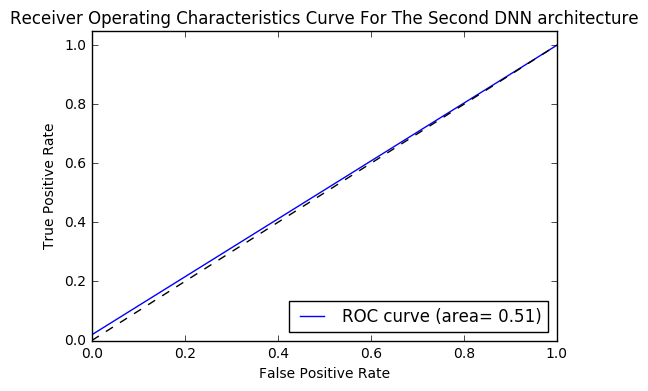

In [39]:
fpr, tpr, thresholds=roc_curve(y_test.astype(np.int64), yhat)
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %2.2f)' % deep2_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve For The Second DNN architecture")
plt.legend(loc="lower right")
plt.show()

### Tuning the hyper-parameters for Architecture 2 :
    

#### What if we tune the hyper-parameters of this second architecture? Can we get better prediction?

In [40]:
# We will increase the number of hidden neurons to be 300 for the two layers at the beginning
# and also we will change the number of steps  to be 300 with the same fixed value for the learning rate (0.1)

In [41]:
%time
import tensorflow as tf
import numpy as np
from tensorflow.contrib import layers
from tensorflow.contrib import learn

#Now, let's look at our second deep neural network architecture

def my_model(features, target):
    print(features)
    target = tf.one_hot(target,2,1,0) #one hot encoding the output as it is a binary output, a 1 or 0 
    features = layers.stack(features, layers.fully_connected, [300, 300]) #we increased the number of neurons here
    features = tf.nn.relu(features)#then passing it through a ReLU function 
    features = tf.nn.relu(features)#passing it through another ReLU
    features = tf.nn.relu(features)
    features = layers.stack(features, layers.fully_connected, [100])
    prediction, loss = (
      tf.contrib.learn.models.logistic_regression_zero_init(features, target) #and then throught a Logistic Regression function
    )
    train_op = tf.contrib.layers.optimize_loss(
      loss, tf.contrib.framework.get_global_step(), optimizer='Adagrad',
      learning_rate=0.1)
    return {'class': tf.argmax(prediction, 1), 'prob': prediction}, loss, train_op
classifier = learn.Estimator(model_fn=my_model)

classifier.fit(X_train.astype(np.float32), y_train.astype(np.int64), steps=300)

Wall time: 0 ns
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', 'save_summary_steps': 100, 'tf_random_seed': None, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'save_checkpoints_steps': None, '_environment': 'local', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000032A06D68>, 'keep_checkpoint_every_n_hours': 10000, '_task_id': 0, 'save_checkpoints_secs': 600, '_task_type': None, '_num_ps_replicas': 0, '_is_chief': True, '_master': '', 'keep_checkpoint_max': 5}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Argu

Estimator(params=None)

In [42]:
yhat_dict =  list(classifier.predict(X_test.astype(np.float32),as_iterable=True))
yhat = np.array([x['class'] for x in yhat_dict])

score = metrics.accuracy_score(y_test.astype(np.int64),yhat)
print(score)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Tensor("input:0", shape=(?, 20), dtype=float32)
Instructions for updating:
Use `tf.contrib.losses.softmax_cross_entropy` and explicit logits computation.
INFO:tensorflow:Loading model from checkpoint: C:\Users\INSTAL~1.15-\AppData\Local\Temp\tmp40wzujd4\model.ckpt-300-?????-of-00001.
0.995500280937


In [43]:
from sklearn.metrics import confusion_matrix
print(" -- Confusion Matrix for the Second DNN architecture -- \n ", confusion_matrix(y_test.astype(np.int64), yhat))

 -- Confusion Matrix for the Second DNN architecture -- 
  [[397932     18]
 [  1888  23744]]


In [ ]:
#There is something wrong here, it shouldn't be like this! We added more neurons, it shouldn't perform this bad
#after adding more neurons, right? 

In [44]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import classification_report
deep2ht_roc_auc=roc_auc_score(y_test.astype(np.int64), yhat)
print("Second Deep NN AUC =%2.2f"%deep2ht_roc_auc)
print(classification_report(y_test.astype(np.int64), yhat) )

Second Deep NN AUC =0.96
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    397950
          1       1.00      0.93      0.96     25632

avg / total       1.00      1.00      1.00    423582



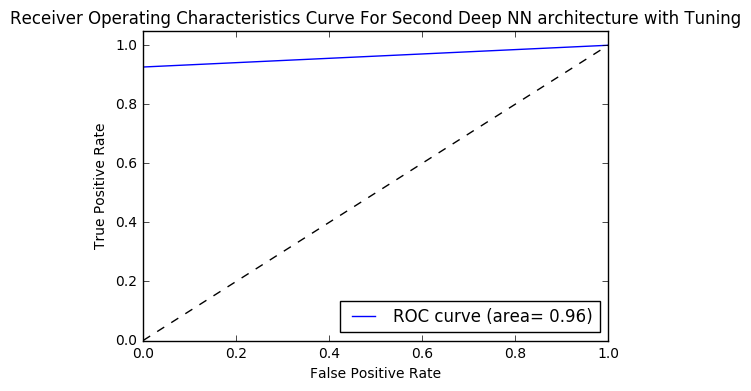

In [45]:
fpr, tpr, thresholds=roc_curve(y_test.astype(np.int64), yhat)
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %2.2f)' % deep2ht_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve For Second Deep NN architecture with Tuning")
plt.legend(loc="lower right")
plt.show()

*Note*: when we used this tuning, we got the above result which is a poor performance. We think that we should increase the 
#number of hidden neurons and that may result in better performance 

#### More Hyper-parameters Tuning 

In [46]:
#continued tuning
%%time
import tensorflow as tf
import numpy as np
from tensorflow.contrib import layers
from tensorflow.contrib import learn

#Now, let's look at our second deep neural network architecture

def my_model(features, target):
    print(features)
    target = tf.one_hot(target,2,1,0) #one hot encoding the output as it is a binary output, a 1 or 0 
    features = layers.stack(features, layers.fully_connected, [400, 400]) #we increased the number of neurons here
    features = tf.nn.relu(features)#then passing it through a ReLU function 
    features = tf.nn.relu(features)#passing it through another ReLU
    features = tf.nn.relu(features)
    features = layers.stack(features, layers.fully_connected, [400])
    prediction, loss = (
      tf.contrib.learn.models.logistic_regression_zero_init(features, target) #and then throught a Logistic Regression function
    )
    train_op = tf.contrib.layers.optimize_loss(
      loss, tf.contrib.framework.get_global_step(), optimizer='Adagrad',
      learning_rate=0.1)
    return {'class': tf.argmax(prediction, 1), 'prob': prediction}, loss, train_op
classifier = learn.Estimator(model_fn=my_model)

classifier.fit(X_train.astype(np.float32), y_train.astype(np.int64), steps=300)

Wall time: 0 ns
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', 'save_summary_steps': 100, 'tf_random_seed': None, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'save_checkpoints_steps': None, '_environment': 'local', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000000478D6A58>, 'keep_checkpoint_every_n_hours': 10000, '_task_id': 0, 'save_checkpoints_secs': 600, '_task_type': None, '_num_ps_replicas': 0, '_is_chief': True, '_master': '', 'keep_checkpoint_max': 5}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Argu

Estimator(params=None)

In [47]:
yhat_dict =  list(classifier.predict(X_test.astype(np.float32),as_iterable=True))
yhat = np.array([x['class'] for x in yhat_dict])

score = metrics.accuracy_score(y_test.astype(np.int64),yhat)
print(score)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Tensor("input:0", shape=(?, 20), dtype=float32)
Instructions for updating:
Use `tf.contrib.losses.softmax_cross_entropy` and explicit logits computation.
INFO:tensorflow:Loading model from checkpoint: C:\Users\INSTAL~1.15-\AppData\Local\Temp\tmptemz583q\model.ckpt-300-?????-of-00001.
0.859916143745


In [48]:
print(" -- After more tuning Confusion Matrix for the Second DNN architecture -- \n ", confusion_matrix(y_test.astype(np.int64), yhat))

 -- After more tuning Confusion Matrix for the Second DNN architecture -- 
  [[338613  59337]
 [     0  25632]]


#comment

In [49]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import classification_report
deep2ht2_roc_auc=roc_auc_score(y_test.astype(np.int64), yhat)
print("Second Deep NN AUC =%2.2f"%deep2ht2_roc_auc)
print(classification_report(y_test.astype(np.int64), yhat) )

Second Deep NN AUC =0.93
             precision    recall  f1-score   support

          0       1.00      0.85      0.92    397950
          1       0.30      1.00      0.46     25632

avg / total       0.96      0.86      0.89    423582



#comment on this result, performance is becoming better again!


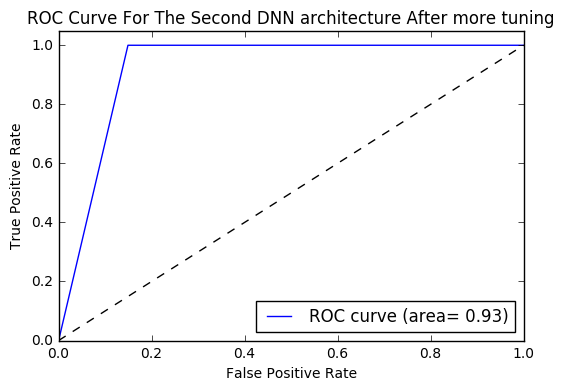

In [50]:
fpr, tpr, thresholds=roc_curve(y_test.astype(np.int64), yhat)
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %2.2f)' % deep2ht2_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve For The Second DNN architecture After more tuning")
plt.legend(loc="lower right")
plt.show()

### Comments on the second architecture and the effect of hyper-parameters tuning:
    
From AUC of 0.5 to 0.87 after tuning the hyper-parameters!
we can see how changing the number of hidden neurons can dramatically change performance 
also the number of steps is vital in the optimization procedure 

### Comparing the two architectures:
    - The largest value of AUC in the first architecture was AUC = 0.86 with Recall of 0.67 and F1 of 0.8 
    - In the second architecture, the highest AUC we obtained is AUC = 0.97, and Recall of 0.95 and F1 = 0.97 
Since we care about the True Negatives, False Positives and also True Positives, we can say that since F1 is much higher 
in the second architecture and there is an increase in teh AUC from 0.86 to 0.97 in the second architecture, 
The second architecture is performing better and results in better prediction capability with less false predictions.

False Negatives are important because if someone should not be arrested and we predicted that they should be arrested 
then this destroys the whole concept behind our model and its goal. Since we want to help law enforcements to make better 
unbiased decision, False Negatives should be minimized so to avoid racism and unprofessionalism.

False Positives are important too and this is because if a person should be arrested and we didn't arrest them, this will
result in  "probably" a free criminal in the streets. And this certainly should be avoided. This is why we care about False 
Positives too.

True positives are of our interest because it gives us an indication of how well we are performing in the sense that 
if a person should be arrested and we predicted that they should be arrested, this means that our model is correct and 
we are helping in making some correct decisions in making arrests. Of course, as we mentioned in lab2, all of these models
should not be applied by any law enforcement until they test these models on the whole big dataset with all 123 features. 
    

### Deployment:
    
Even though the second Deep Neural Network here showed better performance and significant performance over all previous models, 
including all models from lab2 (Logistic regression and Non-linear SVMs) we want to make it clear to the interested organizations
that this model has the following problems:
  - First, this model was only tested on a dataset of 13 features and around 500K instances. NYPD's stop and frisk dataset
    has more than 123 features in their dataset and therefore, we can not say that this model will be useful to NYPD or any 
    law enforcement unless they test it on their data. 
    
  - Second, we noticed some oscillation in the prediction capability when calculating the Area Under the Curve. For example,
    in the first architecture we obtained AUC 0.86 and then we obtained 0.83 without changin the hyper-parameters. We are 
    not sure of the reason but it might be because of the samples that are taken or because the optimizer is giving different
    weights everytime we run the code! Therefore, we recommend the interested organizations to make sure that if they want 
    to use such model, they have to make sure that it is performing within an acceptable window of performance. 
    
  - Third, there are theoretically an infinite amount of architectures that can be used and we can not say that this model
    is the best classifier among all other classifiers. Therefore, we recommend the interested organizations to compare this 
    model's performance with other models, test it on all of their dataset, and only then it might be really useful.